In [ ]:
import pandas as pd
import datetime
import json
def fromtimestamp(unix):
    return datetime.datetime.fromtimestamp(float(unix))

def compute_speed(r):
    if r['road_length'] == 0 or r['road_length'] == 65535:
        return float('nan')
    return round(r['road_length'] / (0.1 * r['travel_time']) * 3.6 , 1)

links_attr = json.load(file('links_attr.json'))

links_type = {}
for (k, v) in links_attr.iteritems():
    links_type[int(k)] = v['type']

def get_status(link, speed):
    try:
        link_type = links_attr[str(link)]['type']
        thresh = status_dict[link_type]
        if speed > thresh[0]:
            return 1
        elif speed < thresh[1]:
            return 3
        else:
            return 2
    except KeyError:
        return 1
            
def map_status(row):
    return get_status(row['link'], row['speed'])

In [125]:
import numpy as np
import itertools
from matplotlib import pylab, pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    cm_raw = cm
    if normalize:
        cm = cm.astype('float') / cm.sum()#cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm_raw[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Siwei')
    plt.xlabel('Hmm')
#     plt.show()

## 市区link

In [29]:
shiqu_links = pd.read_csv("shiqu_links.txt", delimiter="\t", names=["mapid", "id", "kind_num", "kind", "width", "direction", "toll", "const_st", "\n  undconcrid", "snodeid", "enodeid", "funcclass", "length", "detailcity", "\n  through", "unthrucrid", "ownership", "road_cond", "special", "admincodel", "\n  admincoder", "uflag", "onewaycrid", "accesscrid", "speedclass", "\n  lanenums2e", "lanenume2s", "lanenum", "vehcl_type", "elevated", "\n  structure", "usefeecrid", "usefeetype", "spdlmts2e", "spdlmte2s", "\n  spdsrcs2e", "spdsrce2s", "dc_type", "nopasscrid", "outbancrid", "numbancrid", "parkflag"])

In [30]:
shiqu_links.head(2)

,mapid,id,kind_num,kind,width,direction,toll,const_st,undconcrid,snodeid,...,usefeetype,spdlmts2e,spdlmte2s,spdsrcs2e,spdsrce2s,dc_type,nopasscrid,outbancrid,numbancrid,parkflag
0,465872,95465,1,0601,55,1,2,1,NaN,63682,...,NaN,300.0,300.0,NaN,NaN,0,NaN,NaN,NaN,0
1,475802,95650022,2,0602|0604,55,2,2,1,NaN,78605629,...,NaN,400.0,NaN,1.0,NaN,0,NaN,NaN,NaN,0


# 调整路况判断规则

In [65]:
hmm_dir = 'lukuang-wuhu-hmm_v3/'

In [69]:
def load_hmm(day):
    hmm_lukuang = pd.read_csv(hmm_dir + "hmm_"+day+".csv", delimiter="\t",
                    names=["node_pair", "link", "link_class", "speed_class", "speed", "status", "timestamp", "used", "unused"], 
                    parse_dates=["timestamp"], index_col="timestamp")

#     hmm_lukuang['type'] = hmm_lukuang['link'].map(links_type)
    hmm_lukuang = hmm_lukuang[hmm_lukuang['speed']>10]
    return hmm_lukuang

In [70]:
def detect_status(r):
    if r['status'] > 2:
        return 3
    elif r['status'] > 1:
        return 2
    else:
        return 1
status_dict = {'00':[60,40], '01':[40,20], '02':[25,15], '03':[25,15], '04':[20,15], '06':[15,10]}



def load_siwei(day, hour):
    lukuang = pd.read_csv("lukuang-wuhu-siwei/"+day+"/"+hour+".csv", header=None, 
                names=["uniqueid", "traffic_id_type", "direction_flag", "region_type", "objectid_type", "region_id", 
                       "object_id", "road_length", "road_class", "link_type", "timestamp", "location_flag", "flow_flag",
                      "traffic_flag", "incident_flag", "fill_flag", "hfill_flag", "tfill_flag", "lfill_flag", "dfill_flag",
                      "precident_flag", "sprecident_flag", "mprecident_flag", "lprecident_flag", "status", "travel_time",
                       "waiting_time", "link_car_cnt", "link_seq_id"], parse_dates=["timestamp"],  
                          date_parser=fromtimestamp, 
                          index_col=["timestamp"])

    
    # lukuang = lukuang[lukuang.road_class=='0x0']

    lukuang['speed'] = lukuang.apply(lambda r: compute_speed(r), 1)

    lukuang_5min = pd.DataFrame(lukuang.groupby('object_id')[['status', 'speed']].resample('5min').mean())

    lukuang_5min['siwei_status'] = lukuang_5min.apply(lambda r: detect_status(r), 1)
    return lukuang_5min

In [71]:
results = {}
all_cm = {}

## 计算混淆矩阵

####################07####################
####################08####################
####################09####################
####################10####################
####################11####################
####################12####################
####################13####################
####################14####################
####################15####################
####################16####################
####################17####################
####################18####################
####################19####################
####################20####################
####################21####################
####################22####################
####################23####################
[[ 0.78606817  0.20573055  0.00820128]
 [ 0.7393643   0.24987775  0.01075795]
 [ 0.56666667  0.3         0.13333333]]


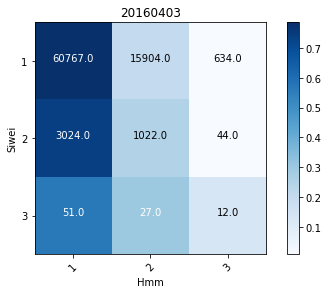

In [72]:
for day in range(3,4):
    day = '2016040' + str(day)
    hmm_lukuang = load_hmm(day)
#     hmm_lukuang['status'] = hmm_lukuang.apply(lambda r: map_status(r), 1)
    results[day] = {}
    all_cm[day] = {}
    for i in range(7, 24):
        hour = str(i).rjust(2, '0')
        if all_cm[day].has_key(hour):
            continue
        
        print '#'*20+hour+'#'*20

        start = day+hour+'00'
        end = day+hour+'59'

        hmm_lukuang_hour = pd.DataFrame(hmm_lukuang[start:end])#.sample(1000)

        hmm_lukuang_hour['timestamp'] = hmm_lukuang_hour.index
        
        siwei_lukuang = load_siwei(day, hour)

        result = pd.merge(hmm_lukuang_hour, siwei_lukuang, right_index=True, left_on=["link", "timestamp"])
        result = pd.merge(result, shiqu_links[['id']], left_on='link', right_on='id')
        result.to_csv(hmm_dir+day+hour+"-shiqu_compare.csv", index=False)
        status_cm = confusion_matrix(result['status_x'].values, result['siwei_status'].values)
        # status_cm = status_cm.astype(float) / status_cm.sum(axis=1)[:, np.newaxis]
        # print status_cm
        all_cm[day][hour] = status_cm
    day_cm = np.zeros((3,3))
    for cm in all_cm[day].values(): day_cm += cm
    plot_confusion_matrix(day_cm , ['1', '2', '3'], True, str(day))

### 抽取市区的一部分道路，计算混淆矩阵

In [ ]:
day_cm = np.zeros((3,3))
for cm in all_cm[day].values(): day_cm += cm
plot_confusion_matrix(day_cm , ['1', '2', '3'], True, str(day))

### 查看有差异的数据
四维判断为畅通，而我们判断为拥堵

In [116]:
compare = pd.read_csv(hmm_dir+"20160403-compare.csv")
compare = compare.drop_duplicates()

In [111]:
compare[(compare.status_x==3)&(compare.siwei_status==1)]

,node_pair,link,link_class,speed_class,speed_x,status_x,used,unused,timestamp,status_y,speed_y,siwei_status,id
396,88439-94965,80506,4,6,13.400000,3,"NHMXT9UMZeJ2FP68QxAf0Q==20160403072657,80506,1...",null,2016-04-03 07:45:00,1.0,38.780,1,80506
412,90122-90123,66168,4,6,14.100000,3,"TSooWIZ4CrK+nhVzwfoN7w==20160403072223,66168,1...",null,2016-04-03 07:20:00,1.0,38.350,1,66168
999,91718-90122,66221,4,6,14.100000,3,"TSooWIZ4CrK+nhVzwfoN7w==20160403072223,66221,1...",null,2016-04-03 07:20:00,1.0,44.550,1,66221
1025,90123-90124,66169,4,6,14.100000,3,"TSooWIZ4CrK+nhVzwfoN7w==20160403072223,66169,1...",null,2016-04-03 07:20:00,1.0,39.000,1,66169
1093,92615-91687,76317,4,6,13.400000,3,"NHMXT9UMZeJ2FP68QxAf0Q==20160403072657,76317,1...",null,2016-04-03 07:45:00,1.0,33.400,1,76317
1530,91709-90118,66215,4,6,13.400000,3,"NHMXT9UMZeJ2FP68QxAf0Q==20160403072657,66215,1...",null,2016-04-03 07:45:00,1.0,38.820,1,66215
2161,94965-91709,80505,4,6,13.400000,3,"NHMXT9UMZeJ2FP68QxAf0Q==20160403072657,80505,1...",null,2016-04-03 07:45:00,1.0,37.900,1,80505
2188,89569-88439,66801,4,6,13.400000,3,"NHMXT9UMZeJ2FP68QxAf0Q==20160403072657,66801,1...",null,2016-04-03 07:45:00,1.0,33.620,1,66801
2222,91687-90114,76312,4,6,13.400000,3,"NHMXT9UMZeJ2FP68QxAf0Q==20160403072657,76312,1...",null,2016-04-03 07:45:00,1.0,32.000,1,76312
2320,88337-88338,69057,4,6,14.000000,3,"QQESxEzckFypbKHQOABGPA==20160403074828,69057,1...",null,2016-04-03 07:45:00,1.0,41.440,1,69057


In [113]:
compare.speed_class.value_counts()

6    61645
7    14277
5     2313
Name: speed_class, dtype: int64

In [123]:
compare.link_class.value_counts()

6    61659
4    16576
Name: link_class, dtype: int64

[[  7.47082508e-01   3.55850962e-02   6.00754138e-04]
 [  1.96088707e-01   1.18233527e-02   3.19550073e-04]
 [  7.80980380e-03   5.49626126e-04   1.40602032e-04]]


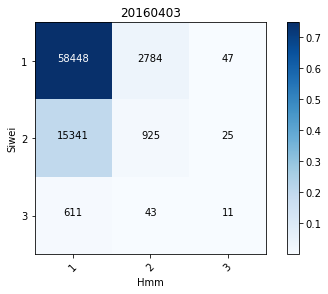

In [127]:
compare_filter = compare[compare.link_class < 8]
day_cm = confusion_matrix(compare_filter['siwei_status'].values, compare_filter['status_x'].values)
# day_cm = confusion_matrix(compare['siwei_status'].values, compare['status_x'].values)
plot_confusion_matrix(day_cm , ['1', '2', '3'], True, str(day))

# 计算速度差值

In [ ]:
import math
def compute_diff(r):
    return r['speed_x'] - r['speed_y']

result['diff'] = result.apply(lambda r: compute_diff(r), 1)
# result['diff'].groupby('type').mean()

In [ ]:
sample = results[day]['09']

In [ ]:
wrong = sample[(sample['status_x'] == 2)&(sample['status_y']==1)]
wrong['diff'] = wrong.apply(lambda w: compute_diff(w), 1)
wrong.sample(10)

In [ ]:
day = '20160402'
day_cm = np.zeros((3,3))
for cm in all_cm[day].values(): day_cm += cm
plot_confusion_matrix(day_cm , ['1', '2', '3'], True, str(day))

In [ ]:
sample = pd.read_csv("20160407.csv", names=["timestamp","node_pair","link","speed_x","count","type","status_x","timestamp_y","status_y","speed_y","mapped_status"], parse_dates=["timestamp"], index_col="timestamp")

In [ ]:
plt.rc('figure', figsize=(20, 10))
plt.rc('font', **{'size': '14'})
for (i, g) in sample.groupby("type"):
    
    plot_confusion_matrix(status_cm, ['1', '2', '3'], True)
    status_cm = confusion_matrix(g['mapped_status'].values, g['status_x'].values)
    g.resample('30min')[['speed_y', 'speed_x']].mean().plot(label=str(i), title=i)
    pd.rolling_mean(g.resample('30min')['speed_x'].mean(), 5, min_periods=1).plot(label='rolling mean')
    pd.ewma(g.resample('30min')['speed_x'].mean(), span=5).plot(label='ewma')
    
    plt.legend(loc='best')

In [ ]:
sample[(sample['type']==0)&(sample['status_x']==2)]['201604070900':'201604071000']